<a href="https://colab.research.google.com/github/joshIsac/nlp_lab/blob/main/joshwin_isac__excercise4_Recurrent_neural_network_weather_prediction_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [18]:
import pandas as pd
import numpy as np
import seaborn as sn
import matplotlib.pyplot as plt

In [19]:
weather_data=pd.read_csv('/content/drive/MyDrive/JOSHWIN ISAC SHAJY 2348523 - seattle-weather.csv')
weather_data.head()

,date,precipitation,temp_max,temp_min,wind,weather
0,01-01-2012,0.0,12.8,5.0,4.7,drizzle
1,02-01-2012,10.9,10.6,2.8,4.5,rain
2,03-01-2012,0.8,11.7,7.2,2.3,rain
3,04-01-2012,20.3,12.2,5.6,4.7,rain
4,05-01-2012,1.3,8.9,2.8,6.1,rain


In [20]:
weather_data.shape

(1461, 6)

In [21]:
weather_data.isnull().sum()

date             0
precipitation    0
temp_max         0
temp_min         0
wind             0
weather          0
dtype: int64

In [22]:
weather_data.describe()

,precipitation,temp_max,temp_min,wind
count,1461.000000,1461.000000,1461.000000,1461.000000
mean,3.029432,16.439083,8.234771,3.241136
std,6.680194,7.349758,5.023004,1.437825
min,0.000000,-1.600000,-7.100000,0.400000
25%,0.000000,10.600000,4.400000,2.200000
50%,0.000000,15.600000,8.300000,3.000000
75%,2.800000,22.200000,12.200000,4.000000
max,55.900000,35.600000,18.300000,9.500000


In [23]:
weather_data['weather'].value_counts()

rain       641
sun        640
fog        101
drizzle     53
snow        26
Name: weather, dtype: int64

In [24]:
weather_data['temp_max'].value_counts()

 11.1    58
 14.4    49
 10.0    47
 12.8    46
 12.2    44
         ..
-0.5      1
-1.6      1
 35.6     1
-1.1      1
 35.0     1
Name: temp_max, Length: 67, dtype: int64

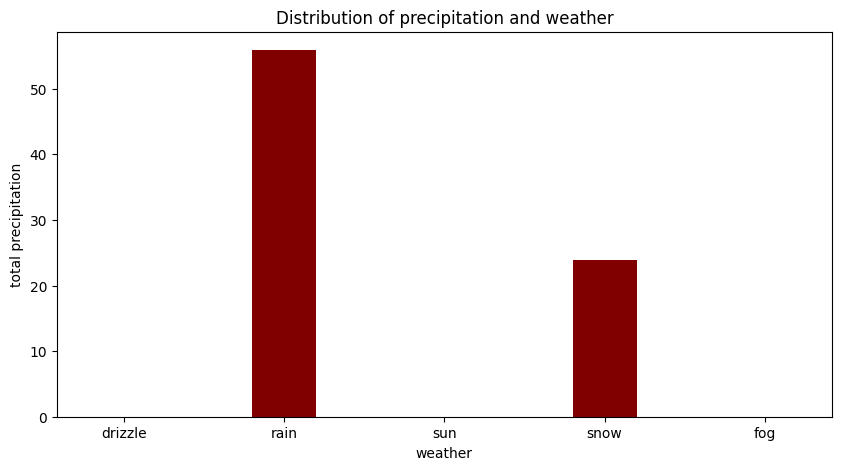

In [25]:
#distribution of precipitation and weather
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(weather_data['weather'],weather_data['precipitation'],color ='maroon', width = 0.4)

plt.xlabel("weather")
plt.ylabel("total precipitation")
plt.title("Distribution of precipitation and weather")
plt.show()

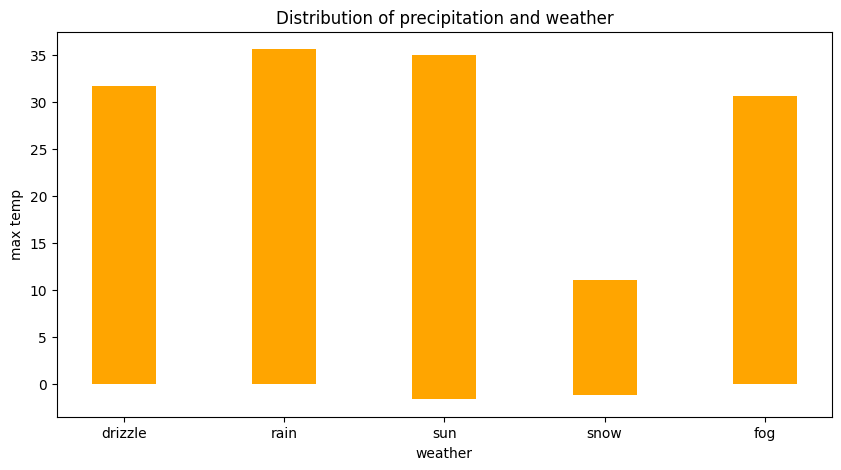

In [26]:
#distribution of temp_max and weather
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(weather_data['weather'],weather_data['temp_max'],color ='orange', width = 0.4)

plt.xlabel("weather")
plt.ylabel("max temp")
plt.title("Distribution of precipitation and weather")
plt.show()

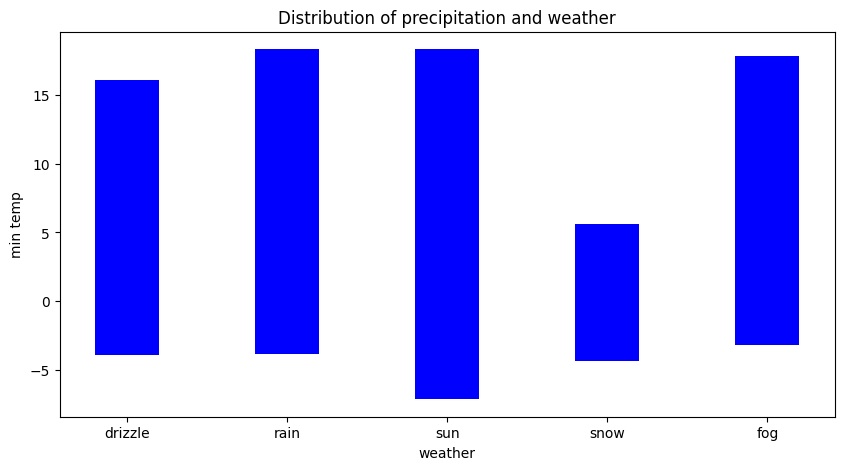

In [27]:
#distribution of temp_max and weather
fig = plt.figure(figsize = (10, 5))

# creating the bar plot
plt.bar(weather_data['weather'],weather_data['temp_min'],color ='blue', width = 0.4)

plt.xlabel("weather")
plt.ylabel("min temp")
plt.title("Distribution of precipitation and weather")
plt.show()

<ipython-input-28-b30683837f6d>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  sn.heatmap(weather_data.corr(), annot=True, cmap='YlGnBu')


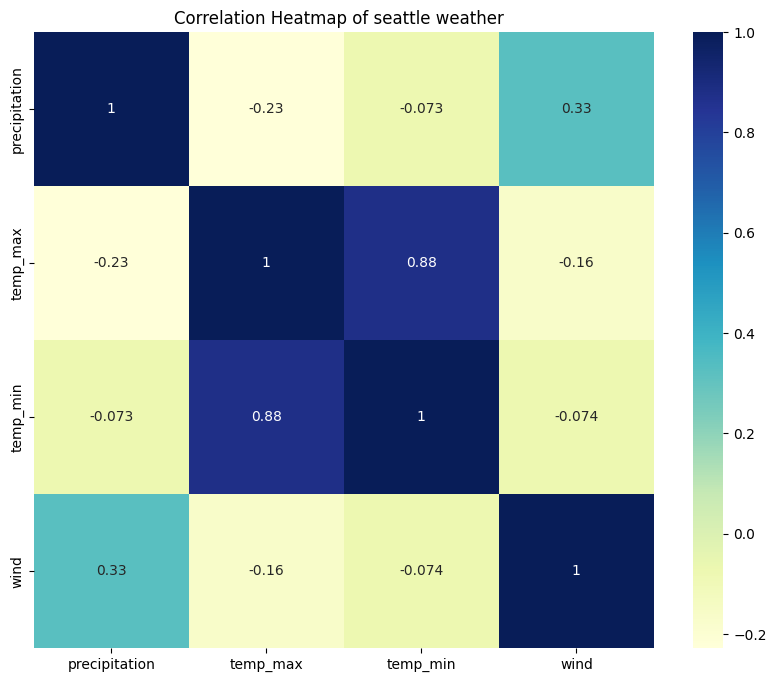

In [28]:
plt.figure(figsize=(10, 8))
sn.heatmap(weather_data.corr(), annot=True, cmap='YlGnBu')
plt.title('Correlation Heatmap of seattle weather  ')
plt.show()

In [29]:
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import SimpleRNN, Dense


weather_data['date'] = pd.to_datetime(weather_data['date'])
weather_data.set_index('date', inplace=True)
data = weather_data[['temp_max']]
data = data.resample('D').mean().fillna(method='ffill')

# Normalize the data
scaler = MinMaxScaler()
data_scaled = scaler.fit_transform(data)

<ipython-input-29-9a9b605b83f9>:6: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  weather_data['date'] = pd.to_datetime(weather_data['date'])


In [31]:
lookback = 1
X,y = [], []

for i in range(len(data_scaled) - lookback):
    X.append(data_scaled[i:i+lookback])
    y.append(data_scaled[i+lookback])

X, y = np.array(X), np.array(y)

# Split data into train and test sets
split = int(0.8 * len(data_scaled))
X_train, X_test = X[:split], X[split:]
y_train, y_test = y[:split], y[split:]

Epoch 1/10
37/37 [==============================] - 2s 2ms/step - loss: 0.0482
Epoch 2/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0187
Epoch 3/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0182
Epoch 4/10
37/37 [==============================] - 0s 3ms/step - loss: 0.0180
Epoch 5/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 6/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0179
Epoch 7/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0178
Epoch 8/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 9/10
37/37 [==============================] - 0s 2ms/step - loss: 0.0177
Epoch 10/10
10/10 [==============================] - 0s 3ms/step - loss: 0.0156
Test Loss: 0.015593179501593113
10/10 [==============================] - 0s 2ms/step


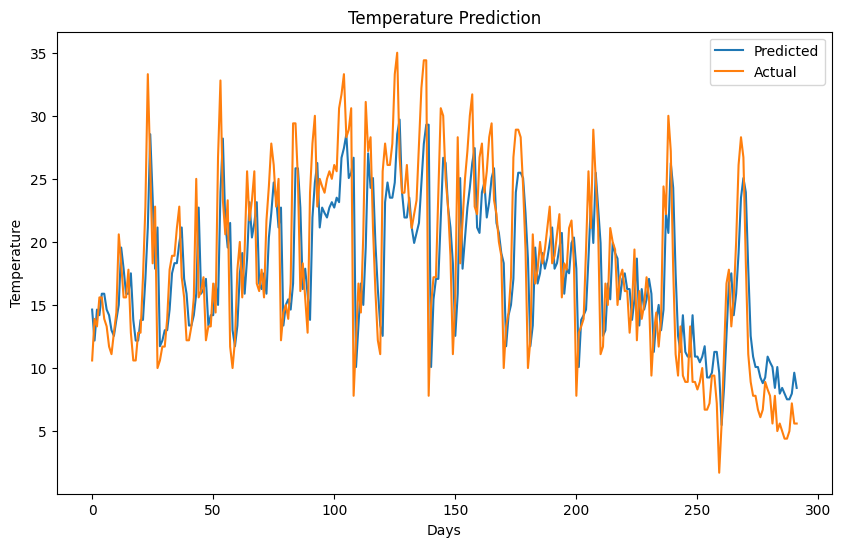

In [32]:
# RNN model
model = Sequential()
model.add(SimpleRNN(units=50, input_shape=(X_train.shape[1], X_train.shape[2])))
model.add(Dense(units=1))

model.compile(optimizer='adam', loss='mean_squared_error')

# Train the model
history = model.fit(X_train, y_train, epochs=10, batch_size=32)

test_loss = model.evaluate(X_test, y_test)
print(f'Test Loss: {test_loss}')

# Make predictions
predictions = model.predict(X_test)

# Inverse transform predictions and actual values
predictions_inv = scaler.inverse_transform(predictions)
y_test_inv = scaler.inverse_transform(y_test)

plt.figure(figsize=(10, 6))
plt.plot(predictions_inv, label='Predicted')
plt.plot(y_test_inv, label='Actual')
plt.xlabel('Days')
plt.ylabel('Temperature')
plt.title('Temperature Prediction')
plt.legend()
plt.show()


In [34]:
import pandas as pd

# Create a DataFrame for actual and predicted values
results_df = pd.DataFrame({'Actual': y_test_inv.flatten(), 'Predicted': predictions_inv.flatten()})

# Print the DataFrame
print(results_df)


     Actual  Predicted
0      10.6  14.634233
1      13.9  12.177999
2      13.3  14.634233
3      15.6  14.189089
4      15.6  15.891671
..      ...        ...
287     4.4   7.520064
288     5.0   7.520064
289     7.2   7.972763
290     5.6   9.629498
291     5.6   8.425114

[292 rows x 2 columns]
